In [1]:
# Import the Relevant Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset.
# Check the shape
# Show the top records
emp = pd.read_csv("employees.csv")
print("Shape ---> ",emp.shape)
print("Top Records ---> ")
emp.head()

Shape --->  (1000, 8)
Top Records ---> 


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [3]:
# Import the dataset.
# Check the shape
# Show the top records


In [4]:
# Find the Average Salary and Average Bonus.
print("Average Salary --> ",emp["Salary"].mean())
print("Average Bonus --> ",emp["Bonus %"].mean())

Average Salary -->  90662.181
Average Bonus -->  10.207555000000001


In [5]:
# Check for the Datatypes and Structre
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
# Check for the Datatypes and Structre


In [7]:

# Convert the Start Date as datetime64
# HINT : .astype('datetime64')
emp.head()
emp["Start Date"]=emp["Start Date"].astype('datetime64')
emp.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services


In [8]:
# Find out how many are there in Senior Management
print(emp["Senior Management"].value_counts())
# The out put of the above is also a dataframe
res= emp["Senior Management"].value_counts()
print(res[True])
print(res[0])
# emp

True     468
False    465
Name: Senior Management, dtype: int64
468
468


In [9]:
res = emp[emp["Senior Management"]==True]["Senior Management"]
print(res.sum())
print(res.count())

468
468


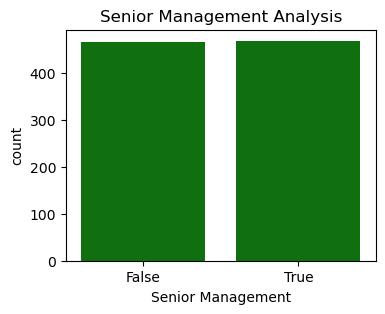

In [10]:
# Display the chart for the "Senior Management" highlighting the COUNT
plt.figure(figsize=(4,3))
sns.countplot(emp,x="Senior Management",color="green")
plt.title("Senior Management Analysis",fontsize=12)
plt.show()

In [11]:
# group_value = emp.groupby("Senior Management").agg(totalrecords=("Senior Management",np.size))
# # print(emp.shape)
# print(group_value)
# # Display the chart for the "Senior Management" highlighting the COUNT
# plt.figure(figsize=(4,3))
# sns.barplot(x=group_value["Senior Management"],y=group_value["totalrecords"],color="green")
# plt.title("Senior Management Analysis",fontsize=12)
# plt.show()

In [12]:
# Display the chart for the "Senior Management" highlighting the COUNT


In [13]:
# Two - Year in which company had maximum HIRE and Min Hire
# emp.head()
emp['Year'] = emp["Start Date"].dt.year
print("Max hire year ---> ",emp['Year'].value_counts().head(1))
print("Min hire year ---> ",emp['Year'].value_counts().tail(1))

Max hire year --->  1995    44
Name: Year, dtype: int64
Min hire year --->  2016    15
Name: Year, dtype: int64


In [14]:
emp["Start Date"].apply(lambda x : str(x).split("-")[0])
# here we are converting it to string and then applying split action to extract the year

0      1993
1      1996
2      1993
3      2005
4      1998
       ... 
995    2014
996    1984
997    2013
998    2013
999    2012
Name: Start Date, Length: 1000, dtype: object

In [15]:
emp.head(5)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Year
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing,1993
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN,1996
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance,1993
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance,2005
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services,1998


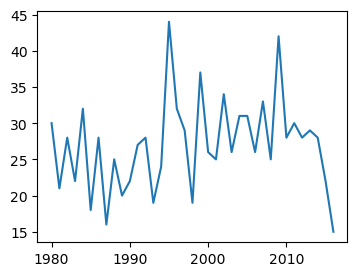

In [16]:
# Two - Year in which company had maximum HIRE and Min Hire
year_count = emp["Year"].value_counts()
# print(year_count.index.values)
# print(year_count.values)
# print(year_count)
plt.figure(figsize=(4,3))
sns.lineplot(x=year_count.index.values,y=year_count.values)
plt.show()

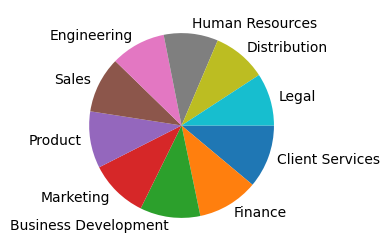

In [17]:
# Find the Team that is having the highest number of records.
# Visualizae the results as Well
team_count = emp["Team"].value_counts()
# print(team_count.index.values)
# print(team_count.values)
# print(team_count[team_count.totalmembers == team_count.totalmembers.max()])
plt.figure(figsize=(4,3))
# sns.barplot(x=team_count.index.values,y=team_count.values)
plt.pie(x=team_count.values, labels=team_count.index.values,startangle=0,counterclock=False)
plt.show()

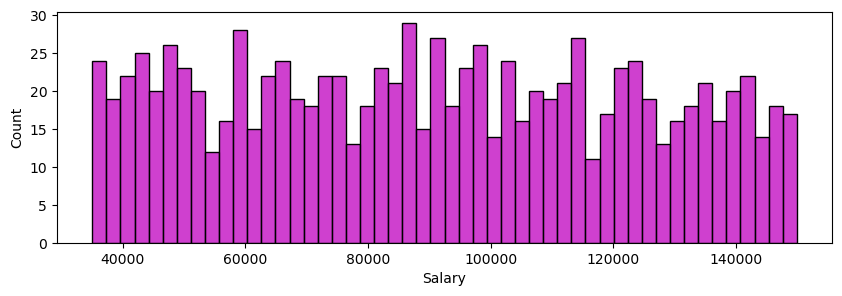

In [18]:
# # Visualizae the Salary Analysis of the dataset
emp.head()
plt.figure(figsize=(10,3))
sns.histplot(emp["Salary"],color="m",bins=50)
plt.show()

In [19]:
# # Visualizae the Salary Analysis of the dataset


Female    431
Male      424
Name: Gender, dtype: int64
['Female' 'Male']
[431 424]


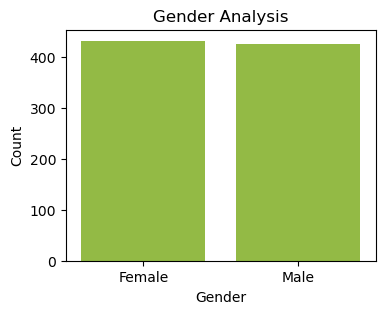

In [20]:
# Find the Gender that is having the highest number of records.
# Visualizae the results as Well

emp.head()
gender_count=emp["Gender"].value_counts()
print(gender_count)
print(gender_count.index.values)
print(gender_count.values)
plt.figure(figsize=(4,3))
sns.barplot(x=gender_count.index.values,y=gender_count.values,color="yellowgreen")
plt.title("Gender Analysis")
plt.xlabel("Gender")
plt.ylabel("Count")
# plt.pie(x=gender_count.values, labels=gender_count.index.values,startangle=0,counterclock=False)
plt.show()

In [21]:
# Find the Gender that is having the highest number of records.
# Visualizae the results as Well



In [22]:
# Find the columns having maximum NA values
# emp.sort_values(by = "Salary",ascending=False)
emp.isna().sum().sort_values(ascending=False).head(1)

Gender    145
dtype: int64

In [23]:
# Visualizae the results of the Team with respect to Average Salary and Bonus. Make Pie or Bar Chart
team_analysis = emp.groupby("Team").agg(totalRecords = ("Team",np.size)
                                       ,AvgSalary = ("Salary",np.mean)
                                       ,AvgBonus = ("Bonus %",np.mean))
team_analysis

,totalRecords,AvgSalary,AvgBonus
Team,,,
Business Development,101,91866.316832,10.572376
Client Services,106,88224.424528,10.495104
Distribution,90,88500.466667,9.615644
Engineering,92,94269.195652,10.462989
Finance,102,92219.480392,10.186873
Human Resources,91,90944.527473,9.993879
Legal,88,89303.613636,10.322830
Marketing,98,90435.591837,10.353449
Product,95,88665.505263,9.791484


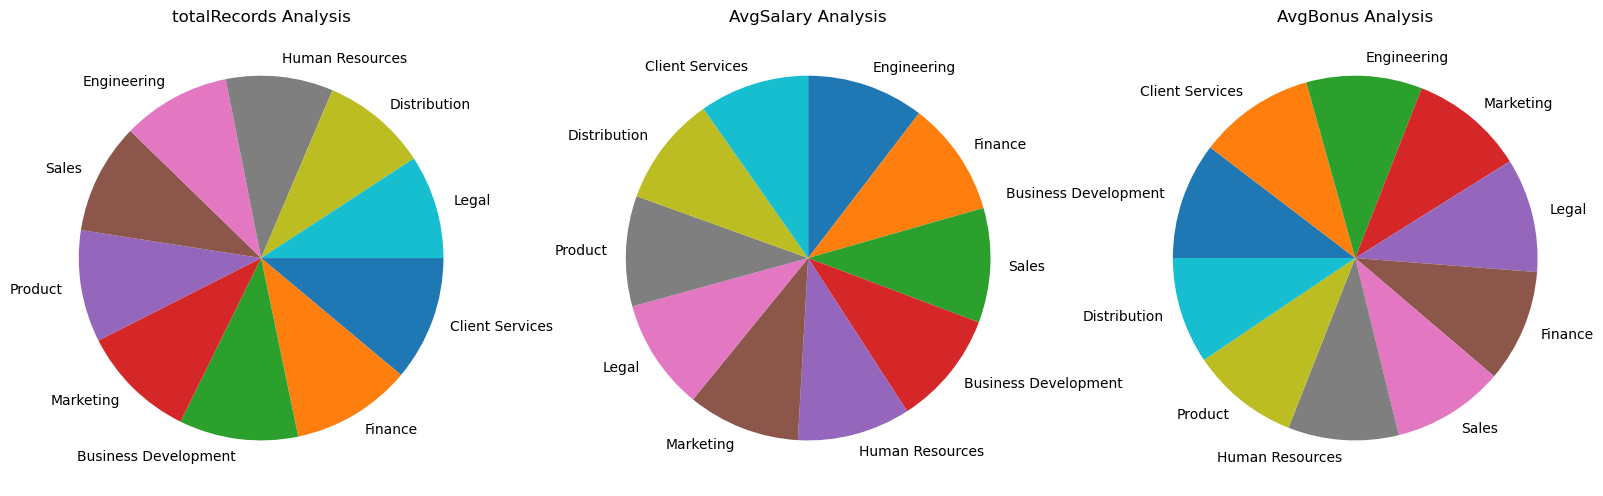

In [70]:
# Visualizae the results of the Team with respect to Average Salary and Bonus. Make Pie or Bar Chart
# print(team_analysis)
plt.figure(figsize=(20,10))
# plt.suptitle("Team Analysis")
plt.subplot(1,3,1)
team_analysis = team_analysis.sort_values(by="totalRecords",ascending=False)
plt.pie(x=team_analysis["totalRecords"],labels=team_analysis.index.values,startangle=0,counterclock=False)
plt.title("totalRecords Analysis")
plt.subplot(1,3,2)
team_analysis = team_analysis.sort_values(by="AvgSalary",ascending=False)
plt.pie(x=team_analysis["AvgSalary"],labels=team_analysis.index.values,startangle=90,counterclock=False)
plt.title("AvgSalary Analysis")
plt.subplot(1,3,3)
team_analysis = team_analysis.sort_values(by="AvgBonus",ascending=False)
plt.pie(x=team_analysis["AvgBonus"],labels=team_analysis.index.values,startangle=180,counterclock=False)
plt.title("AvgBonus Analysis")
plt.show()

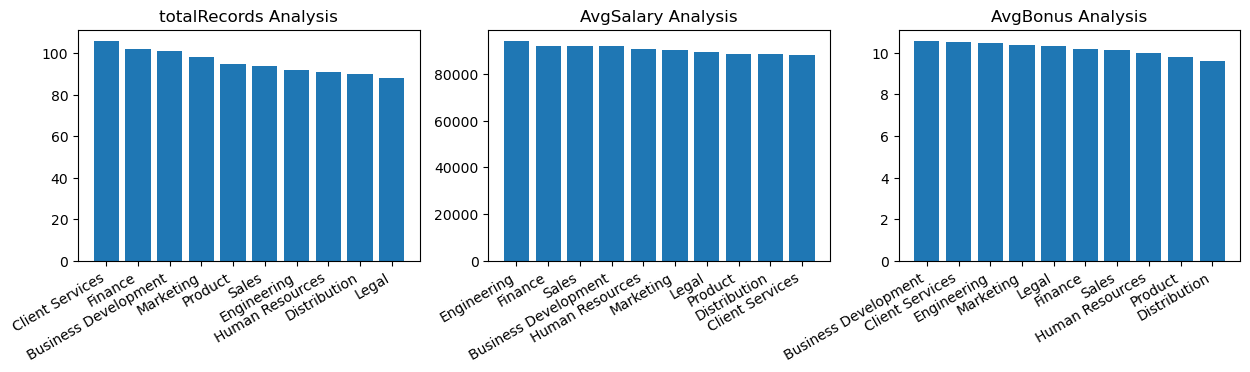

In [69]:
# Visualizae the results of the Team with respect to Average Salary and Bonus. Make Pie or Bar Chart
# print(team_analysis)
plt.figure(figsize=(15,3))
# plt.suptitle("Team Analysis")
plt.subplot(1,3,1)
team_analysis = team_analysis.sort_values(by="totalRecords",ascending=False)
plt.bar(height=team_analysis["totalRecords"],x=team_analysis.index.values)
plt.xticks(rotation=30,ha="right")
plt.title("totalRecords Analysis")
plt.subplot(1,3,2)
team_analysis = team_analysis.sort_values(by="AvgSalary",ascending=False)
plt.bar(height=team_analysis["AvgSalary"],x=team_analysis.index.values)
plt.xticks(rotation=30,ha="right")
plt.title("AvgSalary Analysis")
plt.subplot(1,3,3)
team_analysis = team_analysis.sort_values(by="AvgBonus",ascending=False)
plt.bar(height=team_analysis["AvgBonus"],x=team_analysis.index.values)
plt.xticks(rotation=30,ha="right")
plt.title("AvgBonus Analysis")
plt.show()

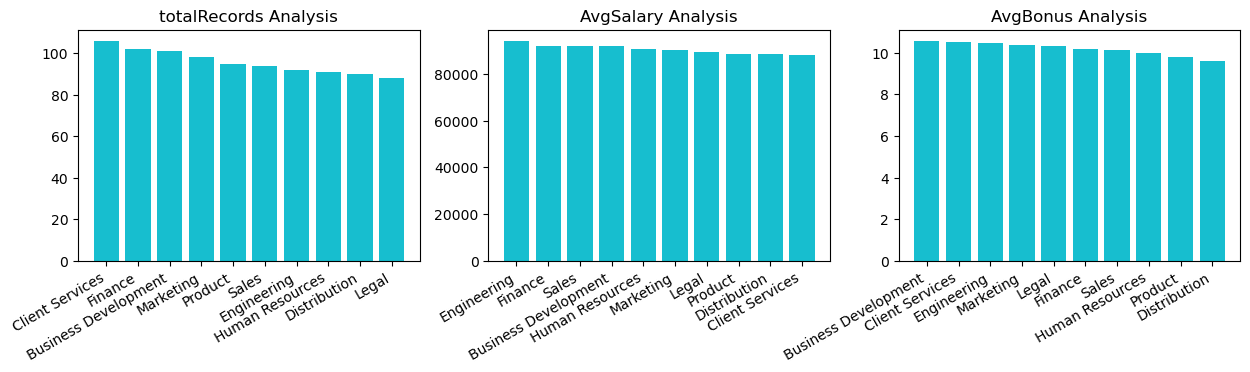

In [100]:
# Visualizae the results of the Team with respect to Average Salary and Bonus. Make Pie or Bar Chart

# Here we can use loops to iterate the chart
ColumnName = team_analysis.index.values
# print(ColumnName)
Position = team_analysis.columns
# print(Position.values)

plt.figure(figsize=(15,3))
for i in range(1, len(Position)+1):
    plt.subplot(1,3,i)
    team_analysis = team_analysis.sort_values(by=Position[i-1],ascending=False)
    ColumnName = team_analysis.index.values
    for j in range(0, len(ColumnName)):
        plt.bar(height=team_analysis[Position[i-1]],x=ColumnName)
        plt.xticks(rotation=30,ha="right")
        plt.title(f"{Position[i-1]} Analysis")
plt.show()

In [27]:
# Find the Business Development employee that are having salary more than 1 lac
emp[(emp["Team"]=="Business Development") & (emp["Salary"] > 100000)]
emp[(emp["Team"]=="Business Development") & (emp["Salary"] > 100000)].shape

(46, 9)

In [28]:
# Find the Finance employee that are having salary less than 50K
emp[(emp["Team"]=="Finance") & (emp["Salary"] < 50000)]
emp[(emp["Team"]=="Finance") & (emp["Salary"] < 50000)].shape

(13, 9)

In [29]:
# Find the employees who joined the organization in 1995, with salary being the highest in that YEAR

emp[emp["Salary"] == emp[emp["Year"]==1995]["Salary"].max()]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Year
765,Alice,NaN,1995-04-23,6:35 AM,148339,11.479,True,Finance,1995


In [30]:
# Find the employees who joined the organization in 1995, with salary being the highest in that YEAR



In [31]:
# Find the employees who joined the organization in 2009, with salary being the highest in that YEAR

emp[emp["Salary"] == emp[emp["Year"]==2009]["Salary"].max()]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Year
740,Russell,NaN,2009-05-09,11:59 AM,149456,3.533,False,Marketing,2009


In [32]:
# Find the employees who joined the organization in 2009, with salary being the highest in that YEAR


In [33]:
year_analysis = emp.groupby("Year").agg(totalRecords = ("Year",np.size)
                                       ,AvgSalary = ("Salary",np.mean)
                                       ,MaxSalary = ("Salary",np.max)
                                       ,MinSalary = ("Salary",np.min)
                                       ,AvgBonus = ("Bonus %",np.mean))
year_analysis.head()

,totalRecords,AvgSalary,MaxSalary,MinSalary,AvgBonus
Year,,,,,
1980,30,80666.333333,145357,35095,10.164900
1981,21,90886.285714,145988,37748,10.679238
1982,28,94920.500000,147183,35061,9.239571
1983,22,87492.363636,145988,36759,10.970864
1984,32,86175.406250,134120,36837,11.700844


In [34]:
## Year Analysis
## Year Analysis. Create a new column for Year from Start Date column


In [35]:
## Find the top 5 Yearss in accordance with the Highest Salaries Joining In
year_analysis.head()
print(year_analysis.sort_values(by = "MaxSalary",ascending=False).head(5).index.values)

[1996 2015 2006 2005 2000]


In [36]:
## Find the top 5 Yearss in accordance with the Highest Acverage Salaries Joining In
year_analysis.head()
print(year_analysis.sort_values(by = "AvgSalary",ascending=False).head(5).index.values)

[1989 2009 1992 1988 2015]
